In [71]:
#1
import pandas as pd
import numpy as np

data_tt1 = {
    'Registration Number': [f'20221320{str(i).zfill(2)}' for i in range(1, 51)],
    'Name': [f'Student {i}' for i in range(1, 51)],
    'TT-1 Marks': np.random.randint(0, 21, 50)
}

df_tt1 = pd.DataFrame(data_tt1)
df_tt1.to_csv('term-test-1-result.csv', index=False)
print(df_tt1)


   Registration Number        Name  TT-1 Marks
0           2022132001   Student 1           4
1           2022132002   Student 2          20
2           2022132003   Student 3          15
3           2022132004   Student 4           9
4           2022132005   Student 5           3
5           2022132006   Student 6          13
6           2022132007   Student 7          11
7           2022132008   Student 8          19
8           2022132009   Student 9           2
9           2022132010  Student 10          16
10          2022132011  Student 11          17
11          2022132012  Student 12           3
12          2022132013  Student 13           8
13          2022132014  Student 14           0
14          2022132015  Student 15          18
15          2022132016  Student 16          11
16          2022132017  Student 17           0
17          2022132018  Student 18           5
18          2022132019  Student 19           2
19          2022132020  Student 20          11
20          2

In [72]:
#2
data_tt2 = {
    'Registration Number': df_tt1['Registration Number'],
    'Name': df_tt1['Name'],
    'TT-2 Marks': np.random.randint(0, 21, 50).round(2)
}

df_tt2 = pd.DataFrame(data_tt2)
df_tt2.to_csv('term-test-2-result.csv', index=False)
print(df_tt2)


   Registration Number        Name  TT-2 Marks
0           2022132001   Student 1           6
1           2022132002   Student 2           2
2           2022132003   Student 3           8
3           2022132004   Student 4           8
4           2022132005   Student 5          13
5           2022132006   Student 6          18
6           2022132007   Student 7           6
7           2022132008   Student 8          17
8           2022132009   Student 9          11
9           2022132010  Student 10          20
10          2022132011  Student 11           1
11          2022132012  Student 12          11
12          2022132013  Student 13          20
13          2022132014  Student 14           9
14          2022132015  Student 15           0
15          2022132016  Student 16          14
16          2022132017  Student 17           1
17          2022132018  Student 18           0
18          2022132019  Student 19          14
19          2022132020  Student 20          15
20          2

In [73]:
#3
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

df_merged = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])
print(df_merged)

    Registration Number        Name  TT-1 Marks  TT-2 Marks
0            2022132001   Student 1           4           6
1            2022132002   Student 2          20           2
2            2022132003   Student 3          15           8
3            2022132004   Student 4           9           8
4            2022132005   Student 5           3          13
5            2022132006   Student 6          13          18
6            2022132007   Student 7          11           6
7            2022132008   Student 8          19          17
8            2022132009   Student 9           2          11
9            2022132010  Student 10          16          20
10           2022132011  Student 11          17           1
11           2022132012  Student 12           3          11
12           2022132013  Student 13           8          20
13           2022132014  Student 14           0           9
14           2022132015  Student 15          18           0
15           2022132016  Student 16     

In [74]:
#4
df_merged['Best TT Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df_merged['Average TT Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1).round(2)
print(df_merged)

    Registration Number        Name  TT-1 Marks  TT-2 Marks  Best TT Marks  \
0            2022132001   Student 1           4           6              6   
1            2022132002   Student 2          20           2             20   
2            2022132003   Student 3          15           8             15   
3            2022132004   Student 4           9           8              9   
4            2022132005   Student 5           3          13             13   
5            2022132006   Student 6          13          18             18   
6            2022132007   Student 7          11           6             11   
7            2022132008   Student 8          19          17             19   
8            2022132009   Student 9           2          11             11   
9            2022132010  Student 10          16          20             20   
10           2022132011  Student 11          17           1             17   
11           2022132012  Student 12           3          11     

In [75]:
#5
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
print(df_merged)

    Registration Number        Name  Best TT Marks  Average TT Marks
0            2022132001   Student 1              6               5.0
1            2022132002   Student 2             20              11.0
2            2022132003   Student 3             15              11.5
3            2022132004   Student 4              9               8.5
4            2022132005   Student 5             13               8.0
5            2022132006   Student 6             18              15.5
6            2022132007   Student 7             11               8.5
7            2022132008   Student 8             19              18.0
8            2022132009   Student 9             11               6.5
9            2022132010  Student 10             20              18.0
10           2022132011  Student 11             17               9.0
11           2022132012  Student 12             11               7.0
12           2022132013  Student 13             20              14.0
13           2022132014  Student 1

In [76]:
#6
attendance_term_final = {
    'Registration Number': df_merged['Registration Number'],
    'Attendance Marks': np.random.randint(5, 11, 50),
    'Term Final Marks': np.random.randint(60, 101, 50)
}

df_attendance = pd.DataFrame(attendance_term_final)
df_attendance.to_csv('attendance-term-final.csv', index=False)


In [77]:
#7
df_attendance = pd.read_csv('attendance-term-final.csv')

df_final = pd.merge(df_merged, df_attendance, on='Registration Number')

df_final['Final Marks'] = (df_final['Term Final Marks'] * 0.7 +
                           df_final['Average TT Marks'] +
                           df_final['Attendance Marks']).round(2)

df_final.to_csv('final-result.csv', index=False)

print(df_final)

    Registration Number        Name  Best TT Marks  Average TT Marks  \
0            2022132001   Student 1              6               5.0   
1            2022132002   Student 2             20              11.0   
2            2022132003   Student 3             15              11.5   
3            2022132004   Student 4              9               8.5   
4            2022132005   Student 5             13               8.0   
5            2022132006   Student 6             18              15.5   
6            2022132007   Student 7             11               8.5   
7            2022132008   Student 8             19              18.0   
8            2022132009   Student 9             11               6.5   
9            2022132010  Student 10             20              18.0   
10           2022132011  Student 11             17               9.0   
11           2022132012  Student 12             11               7.0   
12           2022132013  Student 13             20              

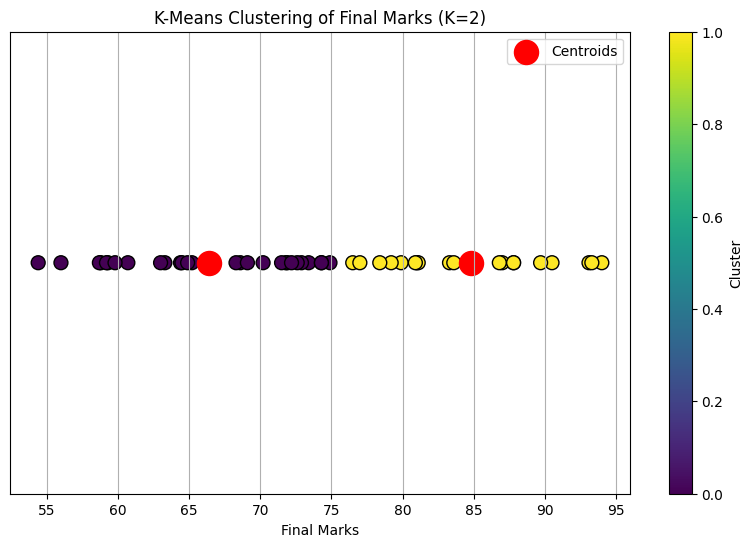

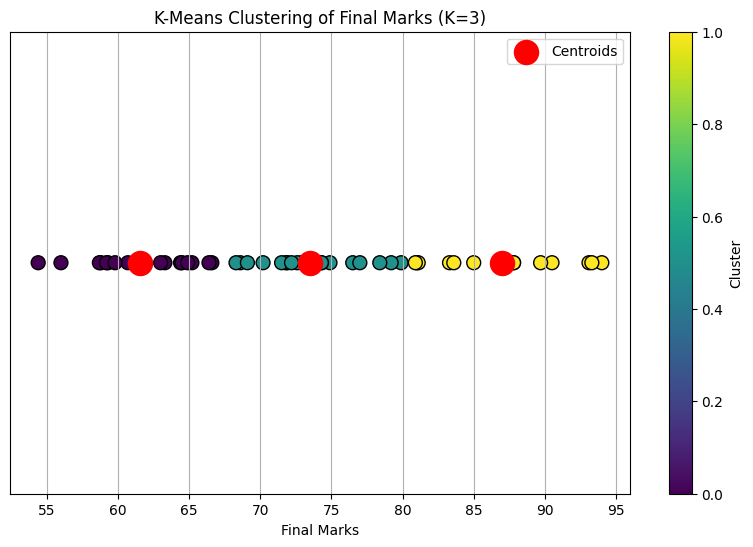

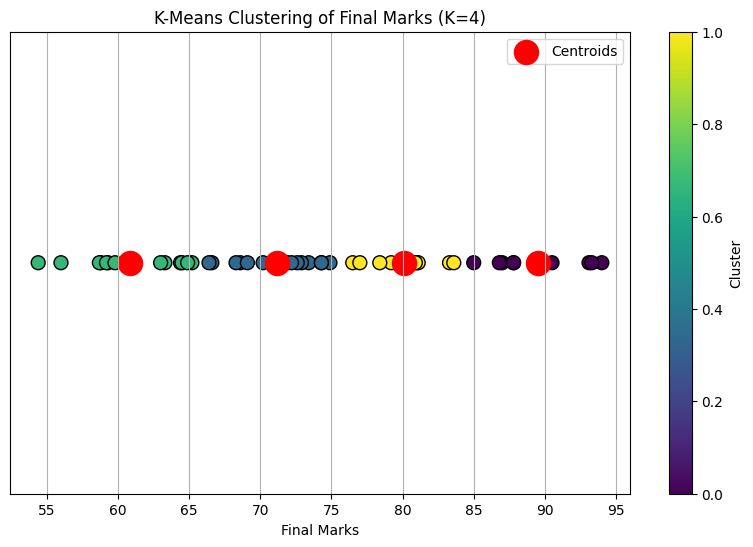

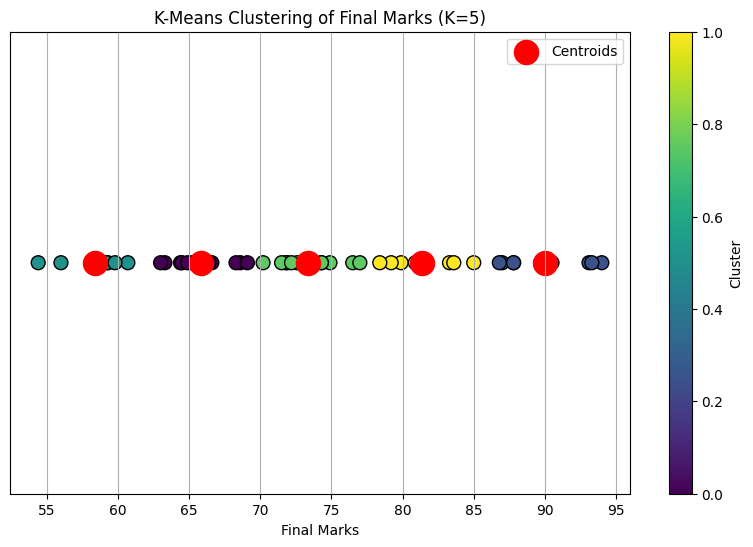

In [78]:
#8

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_final = pd.read_csv('final-result.csv')

X = df_final[['Final Marks']]

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_final['Cluster'] = kmeans.fit_predict(X)


    plt.figure(figsize=(10, 6))
    plt.scatter(df_final['Final Marks'], [0] * len(df_final), c=df_final['Cluster'], cmap='viridis', s=100, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], [0] * k, s=300, c='red', label='Centroids')
    plt.xlabel('Final Marks')
    plt.title(f'K-Means Clustering of Final Marks (K={k})')
    plt.yticks([])
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.grid()
    plt.show()




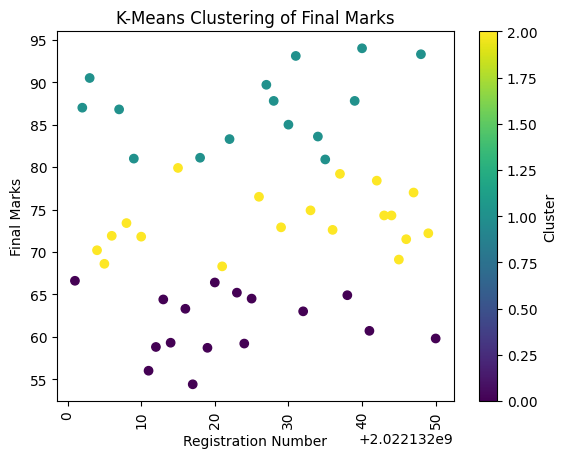

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df_final[['Final Marks']]
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df_final['Cluster'] = kmeans.fit_predict(X)

plt.scatter(df_final['Registration Number'], df_final['Final Marks'], c=df_final['Cluster'], cmap='viridis')
plt.xlabel('Registration Number')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.colorbar(label='Cluster')
plt.xticks(rotation=90)
plt.show()
